In [20]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
from rps_rllib import RPSNoise
import numpy as np
import ray
from ray.rllib import agents
from tqdm.notebook import tqdm
import random
from ray.rllib.examples.env.rock_paper_scissors import RockPaperScissors
from ray.rllib.policy.policy import Policy
from gym.spaces import Discrete, Box
from ray.rllib.agents.ppo import PPOTrainer
from functools import partial
from ray.tune.registry import register_env, _global_registry, ENV_CREATOR
from ray.tune.logger import pretty_print
from ray.rllib.agents.ppo.ppo_tf_policy import PPOTFPolicy

import ray
from ray import tune
from ray.tune import track

import math

In [2]:
ray.init(ignore_reinit_error=True, include_webui=True,
                    temp_dir='/scratch/sergei/tmp')

2020-07-11 19:54:29,313	INFO resource_spec.py:212 -- Starting Ray with 55.86 GiB memory available for workers and up to 27.94 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-07-11 19:54:29,575	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-07-11 19:54:30,285	INFO services.py:1165 -- View the Ray dashboard at localhost:8265


{'node_ip_address': '128.32.175.9',
 'raylet_ip_address': '128.32.175.9',
 'redis_address': '128.32.175.9:6379',
 'object_store_address': '/scratch/sergei/tmp/session_2020-07-11_19-54-29_261873_3892/sockets/plasma_store',
 'raylet_socket_name': '/scratch/sergei/tmp/session_2020-07-11_19-54-29_261873_3892/sockets/raylet',
 'webui_url': 'localhost:8265',
 'session_dir': '/scratch/sergei/tmp/session_2020-07-11_19-54-29_261873_3892'}

In [8]:
trainer = PPOTrainer(config={'train_batch_size': 4000,
                   'framework': 'tfe',
                   'env': 'Reacher-v2',
                   'num_workers': 0})

2020-07-11 19:55:46,650	WARNING util.py:37 -- Install gputil for GPU system monitoring.


In [9]:
for _ in range(10):
    results = trainer.train()
    print(pretty_print(results))

Instructions for updating:
Prefer Variable.assign which has equivalent behavior in 2.X.
custom_metrics: {}
date: 2020-07-11_19-56-22
done: false
episode_len_mean: 50.0
episode_reward_max: -47.0274721815342
episode_reward_mean: -61.177716616566784
episode_reward_min: -72.8425516265993
episodes_this_iter: 80
episodes_total: 80
experiment_id: a784970b238544e199e803ef9abab8f8
hostname: astar
info:
  learner:
    default_policy:
      cur_kl_coeff: 0.20000000298023224
      cur_lr: 4.999999873689376e-05
      entropy: 2.7961018085479736
      entropy_coeff: 0.0
      kl: 0.013937138952314854
      policy_loss: -0.011546189896762371
      total_loss: 632.81103515625
      vf_explained_var: 0.1906045377254486
      vf_loss: 632.8197631835938
  num_steps_sampled: 4000
  num_steps_trained: 4000
iterations_since_restore: 1
node_ip: 128.32.175.9
num_healthy_workers: 0
off_policy_estimator: {}
perf:
  cpu_util_percent: 8.00576923076923
  ram_util_percent: 3.699999999999999
pid: 3892
policy_reward_

In [10]:
?pretty_print

Signature: pretty_print(result)
Docstring: <no docstring>
File:      /scratch/sergei/miniconda3/lib/python3.7/site-packages/ray/tune/logger.py
Type:      function


In [11]:
print("hello")

hello


In [12]:
!ls

adversarial-policies		      rps_rllib-analysis.ipynb
mujoco.ipynb			      rps_rllib.ipynb
multiagent-competition		      rps_rllib.py
__pycache__			      rps_rllib_tune.py
README.md			      rps_rl.py
requirements.txt		      rps_threat_bootstrapping.ipynb
rock_paper_scissors.py		      rps_threat_estimation_poc.ipynb
rps_change_reward_sign.ipynb	      test_env_agent_monitor.py
rps_rllib_alternating-analysis.ipynb  test_rps.py
rps_rllib_alternating_test.ipynb      test_rps_rllib.py
rps_rllib_alternating_tune.py


In [9]:
dir(gym_compete)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'os',
 'register']

Creating agent humanoid_blocker
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Creating agent humanoid
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Scene XML path: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/world_body.humanoid_body.humanoid_body.xml
Created Scene with agents


In [1]:
import gym
import gym_compete
import numpy as np
import os
os.environ["DISPLAY"] = ':0'
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
env = gym.make('multicomp/YouShallNotPassHumans-v0')
env.action_space

In [18]:
r = env.step((np.zeros(17), np.zeros(17)))

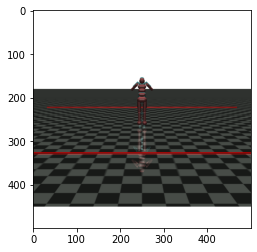

In [19]:
plt.imshow(env.render(mode='rgb_array'))

In [5]:
import gym
gym.make('Reacher-v2').render(mode='rgb_array')

AttributeError: module 'mujoco_py' has no attribute 'load_model_from_path'

In [1]:
import pickle

In [2]:
policy = pickle.load(open('multiagent-competition/gym_compete/agent_zoo/YouShallNotPassHumans-v0/agent2_parameters-v1.pkl', 'rb'))

In [4]:
policy.shape

(59039,)

(array([ 1273.,  2035.,  3471.,  5806., 14089., 14302.,  5901.,  3585.,
         2103.,  1249.]),
 array([-9.9997157e-01, -8.0000502e-01, -6.0003841e-01, -4.0007186e-01,
        -2.0010528e-01, -1.3870001e-04,  1.9982788e-01,  3.9979446e-01,
         5.9976101e-01,  7.9972762e-01,  9.9969417e-01], dtype=float32),
 <a list of 10 Patch objects>)

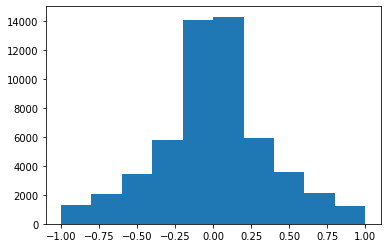

In [27]:
plt.hist(policy[np.abs(policy) < 1])

(array([5.9034e+04, 2.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

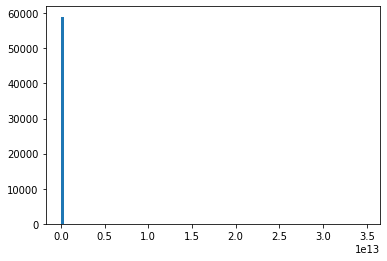

In [19]:
plt.hist(policy, bins=100)

In [1]:
from aprl.envs.gym_compete import load_zoo_agent

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




In [3]:
import gym
import gym_compete
import numpy as np
import os
os.environ["DISPLAY"] = ':0'
from matplotlib import pyplot as plt
%matplotlib inline
env = gym.make('multicomp/YouShallNotPassHumans-v0')


Creating agent humanoid_blocker
Reading agent XML from: /home/sergei/git/chai/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Creating agent humanoid
Reading agent XML from: /home/sergei/git/chai/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Scene XML path: /home/sergei/git/chai/multiagent-competition/gym_compete/new_envs/assets/world_body.humanoid_body.humanoid_body.xml
Created Scene with agents


In [2]:
?load_zoo_agent

Signature: load_zoo_agent(tag, env, env_name, index, transparent_params)
Docstring:
Loads a gym_compete zoo agent.
:param tag: (str) version of the zoo agent (e.g. '1', '2', '3').
:param env: (gym.Env) the environment
:param env_name: (str) Gym environment ID
:param index: (int) the player ID of the agent we want to load ('0' or '1')
:return a BaseModel, where predict executes the loaded policy.
File:      ~/git/chai/adversarial-policies/src/aprl/envs/gym_compete.py
Type:      function


In [78]:
policy = load_zoo_agent('1', env, 'multicomp/YouShallNotPassHumans-v0', 0, None)

In [79]:
policy.params

In [7]:
env.num_envs=1

In [11]:
dir(policy)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_get_policy_out',
 '_get_pretrain_placeholders',
 '_init_callback',
 '_init_num_timesteps',
 '_is_vectorized_observation',
 '_load_from_file',
 '_load_from_file_cloudpickle',
 '_param_load_ops',
 '_requires_vec_env',
 '_save_to_file',
 '_save_to_file_cloudpickle',
 '_save_to_file_zip',
 '_setup_learn',
 '_setup_load_operations',
 '_softmax',
 '_vec_normalize_env',
 '_vectorize_action',
 'action_probability',
 'action_space',
 'env',
 'ep_info_buf',
 'episode_reward',
 'get_env',
 'get_parameter_list',
 'get_parameters',
 'get_vec_normalize_env',
 'graph',
 'learn',
 'lo

In [18]:
policy.policy

aprl.envs.gym_compete.TransparentMLPPolicyValue

In [158]:
self = policy.policy_obj
mlp_policy = policy.policy_obj

In [22]:
with self.sess.graph.as_default():
    var_list = self.get_trainable_variables()
    print(var_list)

[<tf.Variable 'zoo_policy_1_0/retfilter/sum:0' shape=() dtype=float32_ref>, <tf.Variable 'zoo_policy_1_0/retfilter/sumsq:0' shape=() dtype=float32_ref>, <tf.Variable 'zoo_policy_1_0/retfilter/count:0' shape=() dtype=float32_ref>, <tf.Variable 'zoo_policy_1_0/obsfilter/sum:0' shape=(380,) dtype=float32_ref>, <tf.Variable 'zoo_policy_1_0/obsfilter/sumsq:0' shape=(380,) dtype=float32_ref>, <tf.Variable 'zoo_policy_1_0/obsfilter/count:0' shape=() dtype=float32_ref>, <tf.Variable 'zoo_policy_1_0/vff1/w:0' shape=(380, 64) dtype=float32_ref>, <tf.Variable 'zoo_policy_1_0/vff1/b:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'zoo_policy_1_0/vff2/w:0' shape=(64, 64) dtype=float32_ref>, <tf.Variable 'zoo_policy_1_0/vff2/b:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'zoo_policy_1_0/vfffinal/w:0' shape=(64, 1) dtype=float32_ref>, <tf.Variable 'zoo_policy_1_0/vfffinal/b:0' shape=(1,) dtype=float32_ref>, <tf.Variable 'zoo_policy_1_0/pol1/w:0' shape=(380, 64) dtype=float32_ref>, <tf.Variable 'zo

In [140]:
self.ob_rms.mean

<tf.Tensor 'zoo_policy_1_0/obsfilter/truediv:0' shape=(380,) dtype=float32>

In [126]:
prefix = 'zoo_policy_1_0/retfilter/'

In [128]:
variables = self.get_trainable_variables()

In [152]:
def get_normalizer_dict()
    variables = 
    normalizer = {}
    for v in variables:
        if v.name.startswith(prefix):
            print(v)
            suffix = v.name[len(prefix):-2]
            normalizer[suffix] = self.sess.run(v)

    normalizer['mean'] = normalizer['sum'] / normalizer['count']
    normalizer['var_est'] = normalizer['sumsq'] / normalizer['count'] - normalizer['mean']
    normalizer['std'] = np.sqrt(np.maximum(normalizer['var_est'], 1e-2))

SyntaxError: invalid syntax (<ipython-input-152-d6d49d6d9f31>, line 1)

In [191]:
class ObservationPreprocessingLayer(tf.keras.layers.Layer):
    """Normalizing observations as in
    https://github.com/HumanCompatibleAI/multiagent-competition/blob/72c342c4178cf189ea336a743f74e445faa6183a/gym_compete/policy.py#L77
    
    Args:
        obs_mean: mean of observation (to subtract)
        obs_std: std of observation (to divide by)
        clip_value: clip observations after normalization
        
    Returns:
        Callable which does the processing.
    """
    
    def __init__(self, obs_mean, obs_std, clip_value):
        super(ObservationPreprocessingLayer, self).__init__()
        self.mean = tf.Variable(obs_mean, trainable=False, name='mean')
        self.std = tf.Variable(obs_std, trainable=False, name='std')
        self.clip = tf.Variable(clip_value, trainable=False, name='clip')

    def call(self, inputs):
        return keras.backend.clip((inputs - self.mean) / self.std, -self.clip, self.clip)


In [264]:
class ValuePostprocessingLayer(tf.keras.layers.Layer):
    """Normalizing values as in
    https://github.com/HumanCompatibleAI/multiagent-competition/blob/72c342c4178cf189ea336a743f74e445faa6183a/gym_compete/policy.py#L128
    
    Args:
        value_mean: mean value to add
        value_std: multiply NN output by this
        
    Returns:
        Callable which does the processing.
    """
    def __init__(self, value_mean, value_std):
        self.mean = self.add_weight(shape=value_mean.shape,
                                    initializer=tf.keras.initializers.Constant(value_mean),
                                    trainable=False, name='mean',
                                    dtype=tf.float32)
        self.std = self.add_weight(shape=value_std.shape,
                                    initializer=tf.keras.initializers.Constant(value_std),
                                    trainable=False, name='std',
                                    dtype=tf.float32)
        super(ValuePostprocessingLayer, self).__init__(dtype=tf.float32)


    def call(self, inputs):
        return inputs * self.std + self.mean

In [258]:
import tensorflow as tf

In [259]:
graph = self.sess.graph.as_graph_def()

In [260]:
nodes = list(graph.node)

In [261]:
import tensorflow.keras as keras

In [262]:
obs_mean, obs_std = mlp_policy.sess.run([mlp_policy.ob_rms.mean, mlp_policy.ob_rms.std])
value_mean, value_std = mlp_policy.sess.run([mlp_policy.ret_rms.mean, mlp_policy.ret_rms.std])

In [265]:
model_policy = keras.Sequential([
    ObservationPreprocessingLayer(obs_mean, obs_std, 5),
    keras.layers.Dense(64, input_shape=(380,), activation='tanh', use_bias=True),
    keras.layers.Dense(64, activation='tanh', use_bias=True),
    keras.layers.Dense(17, activation=None, use_bias=True),
])

model_value = keras.Sequential([
    ObservationPreprocessingLayer(obs_mean, obs_std, 5),
    keras.layers.Dense(64, input_shape=(380,), activation='tanh', use_bias=True),
    keras.layers.Dense(64, activation='tanh', use_bias=True),
    keras.layers.Dense(1, activation=None, use_bias=True),
    ValuePostprocessingLayer(value_mean, value_std)
])

AttributeError: 'ValuePostprocessingLayer' object has no attribute '_dtype_policy'

In [253]:
env.action_space

Tuple(Box(17,), Box(17,))

In [254]:
import pickle
policy1 = pickle.load(open('multiagent-competition/gym_compete/agent_zoo/YouShallNotPassHumans-v0/agent2_parameters-v1.pkl', 'rb'))

In [255]:
saved_weights = policy1.shape[0]

In [256]:
model_weights = model_policy.count_params() + model_value.count_params()

ValueError: You tried to call `count_params` on sequential_19, but the layer isn't built. You can build it manually via: `sequential_19.build(batch_input_shape)`.

In [219]:
print(saved_weights - model_weights)

781


In [122]:
380 * 2 - 781

-21

In [220]:
model_policy.compile('adam', 'mse')

In [226]:
with tf.Session().as_default():
    model_policy(np.zeros(380))

ValueError: in converted code:

    <ipython-input-191-f74cd509aac7>:21 call  *
        return keras.backend.clip((inputs - self.mean) / self.std, -self.clip, self.clip)
    /home/sergei/miniconda3/envs/tf1/lib/python3.7/site-packages/tensorflow_core/python/ops/math_ops.py:897 binary_op_wrapper
        with ops.name_scope(None, op_name, [x, y]) as name:
    /home/sergei/miniconda3/envs/tf1/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:6334 __enter__
        g_from_inputs = _get_graph_from_inputs(self._values)
    /home/sergei/miniconda3/envs/tf1/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:5979 _get_graph_from_inputs
        _assert_same_graph(original_graph_element, graph_element)
    /home/sergei/miniconda3/envs/tf1/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:5914 _assert_same_graph
        (item, original_item))

    ValueError: Tensor("mean:0", shape=(380,), dtype=float32_ref) must be from the same graph as Tensor("Const_13:0", shape=(380,), dtype=float64).


## Meeting on 13th of July
1. load the policy (continue current direction)
2. test that can get an adversary like the one in aprl
   * use large batch size, do reward clipping (have a large reward range), use small learning rate -- see aprl code&paper
   * try PPO/A3C/impala
3. run training in bursts
4. might be better to run 14 environments instead of 28, only have 14 cores -- benchmark
5. can switch to another machine/use AWS if astar is busy